# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm

# Loading Data

In [2]:
df = pd.read_csv('/kaggle/input/iris-data/Iris.csv')

# Features

In [3]:
X1 = df['SepalLengthCm']
X2 = df['PetalLengthCm']
Y  = df['PetalWidthCm'] 

# Building a Baysian Model (Linear Regression)

In [4]:
with pm.Model() as multimodel:
    intercept = pm.Normal('intercept',mu =0,sd=20)
    slope_X1 = pm.Normal('slope_X1',mu=0,sd=20)
    slope_X2 = pm.Normal('slope_X2',mu=0,sd=10)
    y_pred = slope_X1 * X1 + slope_X2 * X2 + intercept
    likelihood = pm.Normal('likelihood',mu=y_pred,sd=10,observed=Y)
    trace = pm.sample(1000,tune=1000)

/opt/conda/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/opt/conda/lib/python3.10/site-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


# Plotting Trace

/tmp/ipykernel_21/851248946.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.k

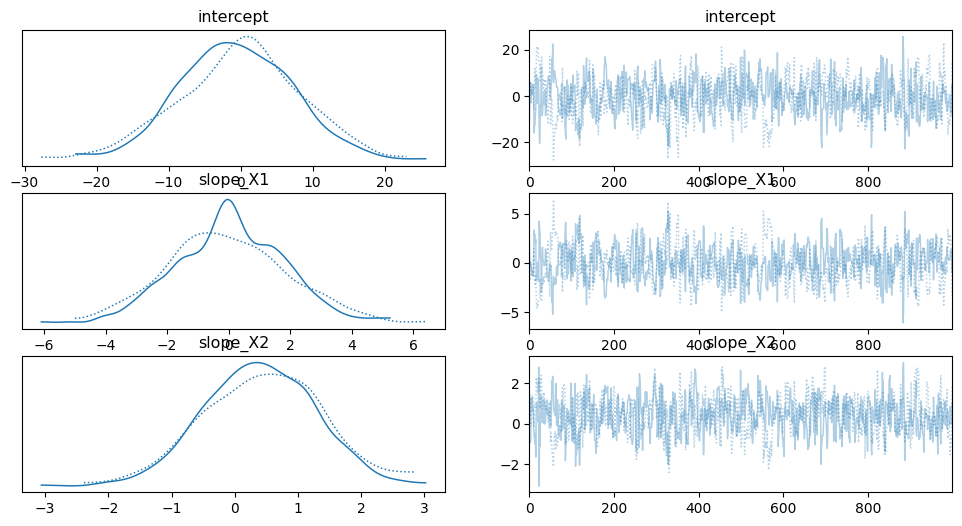

In [5]:
pm.traceplot(trace)
plt.show()

# Summary

In [6]:
pm.summary(trace)

/opt/conda/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,-0.373,8.034,-15.150,14.916,0.417,0.295,375.0,502.0,1.00
slope_X1,0.000,1.839,-3.333,3.506,0.098,0.069,355.0,471.0,1.01
slope_X2,0.420,0.905,-1.216,2.151,0.045,0.032,409.0,529.0,1.00


In [7]:
posterior_predictive = pm.sample_posterior_predictive(trace, samples=1000, model=multimodel)
y_pred_mean = posterior_predictive['likelihood'].mean(axis=0)

/opt/conda/lib/python3.10/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


# Calculate the total variance & residual variance

In [8]:
total_variance = np.var(Y)
residual_variance = np.var(Y - y_pred_mean)

# Calculate the Bayesian R-squared

In [9]:
bayesian_r_squared = 1 - (residual_variance / total_variance)
print(f"Bayesian R-squared: {bayesian_r_squared:.2f}")

Bayesian R-squared: 0.72


# Finding the corelation between the independent and dependent variables

In [10]:
sepalLength_petal_length = df['SepalLengthCm'].corr(df['PetalLengthCm'])
sepalLength_petal_width  = df['SepalLengthCm'].corr(df['PetalWidthCm'])

petalLength_sepal_length = df['PetalLengthCm'].corr(df['SepalLengthCm'])
petalLength_petal_width  = df['PetalLengthCm'].corr(df['PetalWidthCm'])

sepalWidth_petal_length = df['SepalWidthCm'].corr(df['PetalLengthCm'])
sepalWidth_petal_width  = df['SepalWidthCm'].corr(df['PetalWidthCm'])

# Displaying Results

In [11]:
print("Sepal & Petal Length Corelation : ",sepalLength_petal_length)
print("Sepal Length & Petal Width Corelation : ",sepalLength_petal_width)
print("----------------------------------------------------------------")
print("Petal & Sepal Length Corelation : ",petalLength_sepal_length)
print("Petal Length & Petal Width Corelation : ",petalLength_petal_width)

print("----------------------------------------------------------------")
print("Sepal Width & Petal Length Corelation : ",sepalWidth_petal_length)
print("Sepal Width & Petal Width Corelation : ",sepalWidth_petal_width)

print("----------------------------------------------------------------")

Sepal & Petal Length Corelation :  0.8717541573048718
Sepal Length & Petal Width Corelation :  0.8179536333691636
----------------------------------------------------------------
Petal & Sepal Length Corelation :  0.8717541573048718
Petal Length & Petal Width Corelation :  0.9627570970509663
----------------------------------------------------------------
Sepal Width & Petal Length Corelation :  -0.42051609640115445
Sepal Width & Petal Width Corelation :  -0.35654408961380535
----------------------------------------------------------------


# Visualizing 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


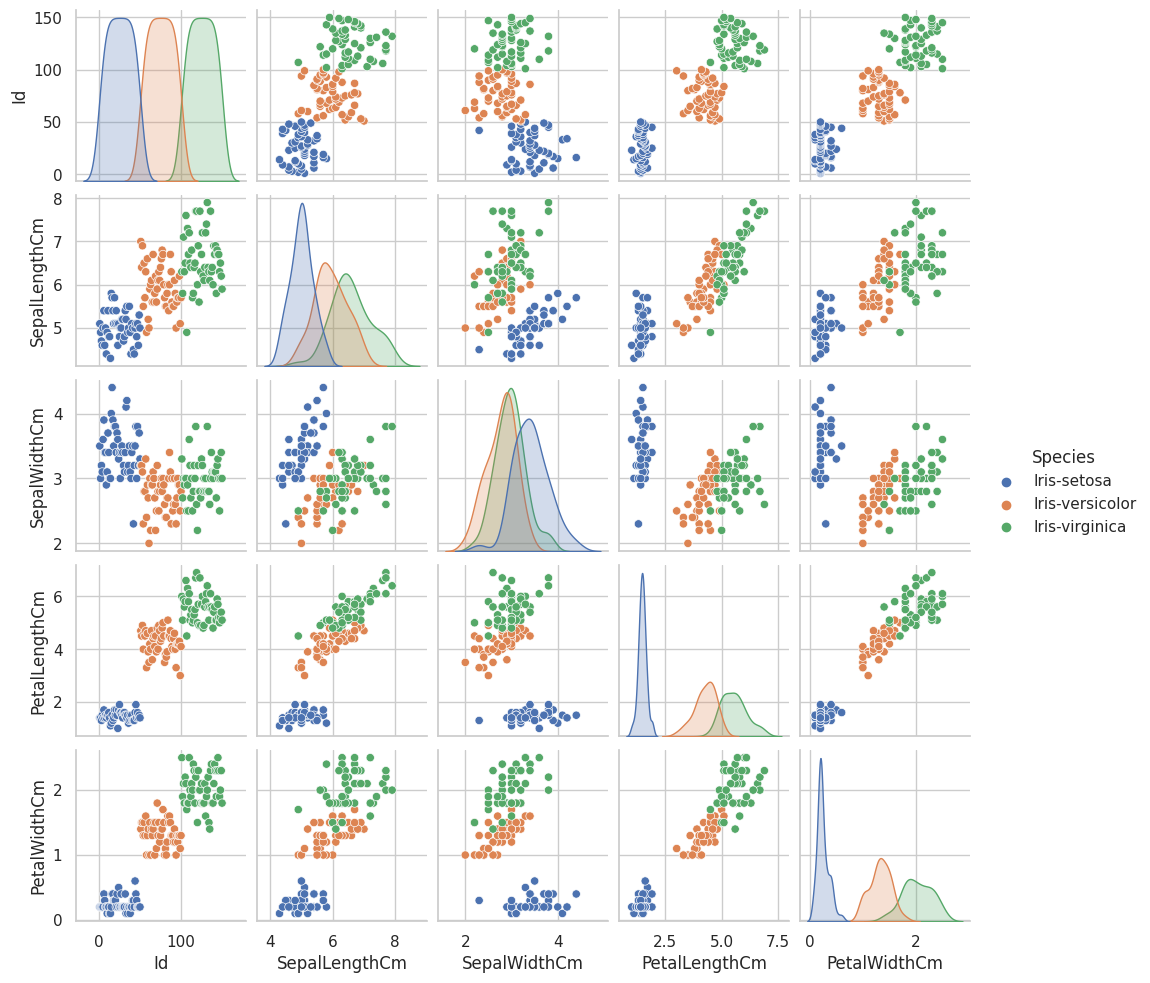

In [12]:
sns.set(style="whitegrid")
sns.pairplot(df, hue="Species", height=2)
plt.show()

# Sepal length is effecting Petal length and Petal width

In [13]:
print("If we look at the corelation of Sepal and Petal length which is upto 87% ")
print('If we look at the Baysian R square value for this model, its less then the value for indivial petal length and petal width')
print('This hows that the sepal lenght will change the result ')

If we look at the corelation of Sepal and Petal length which is upto 87% 
If we look at the Baysian R square value for this model, its less then the value for indivial petal length and petal width
This hows that the sepal lenght will change the result 


# Sepal Length vs. Petal Length with Regression Line

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

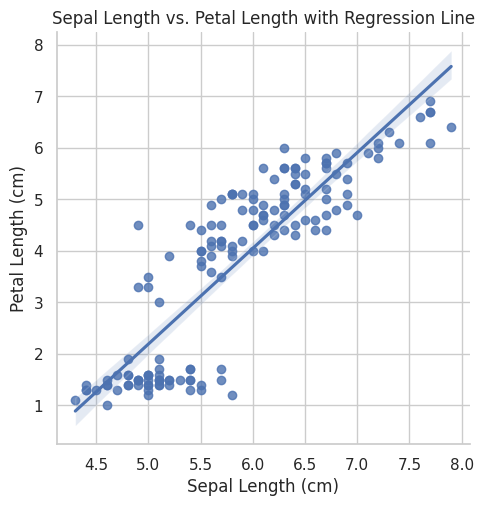

In [14]:
sepal_length = df['SepalLengthCm']
petal_length = df['PetalLengthCm']

# Create a scatterplot with a regression line
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', data=df)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs. Petal Length with Regression Line')
plt.show()